In [ ]:
!pip install -Uqq fastbook
from fastai.vision.all import *
# import fastbook
# fastbook.setup_book()

In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'
plt.rcParams["figure.figsize"] = (13, 13)

print(tf.__version__)

2.7.0


# Importar datos

Moda MNIST esta construida como un reemplazo para el set de datos clasico MNIST casi siempre utilizado como el "Hola Mundo" de programas de aprendizaje automatico (ML) para computo de vision. El set de datos de MNIST contiene imagenes de digitos escrito a mano (0, 1, 2, etc.) en un formato identico al de los articulos de ropa que va a utilizar aca.

Esta guia utiliza Moda MNIST para variedad y por que es un poco mas retador que la regular MNIST. Ambos set de datos son relativamente pequenos y son usados para verificar que el algoritmo funciona como debe.

Aca, 60,000 imagenes son usadas para entrenar la red neuronal y 10,000 imagenes son usadas para evaluar que tan exacto aprendia la red a clasificar imagenes. Pueden acceder al set de moda de MNIST directamente desde TensorFlow. Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Al cargar el set de datos retorna cuatro arreglos en NumPy:

* El arreglo `train_images` y `train_labels` son los arreglos que *training set*—el modelo de datos usa para aprender.
* el modelo es probado contra los arreglos *test set*, el `test_images`, y `test_labels`.

Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los *labels* son un arreglo de integros, que van del 0 al 9. Estos corresponden a la *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidoen el dataset, almacenelo aca para usarlos luego cuando se visualicen las imagenes:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explorar datos

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

## Pre-procesar datos

El set de datos debe ser pre-procesada antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

In [ ]:
train_images[0].shape

(28, 28)

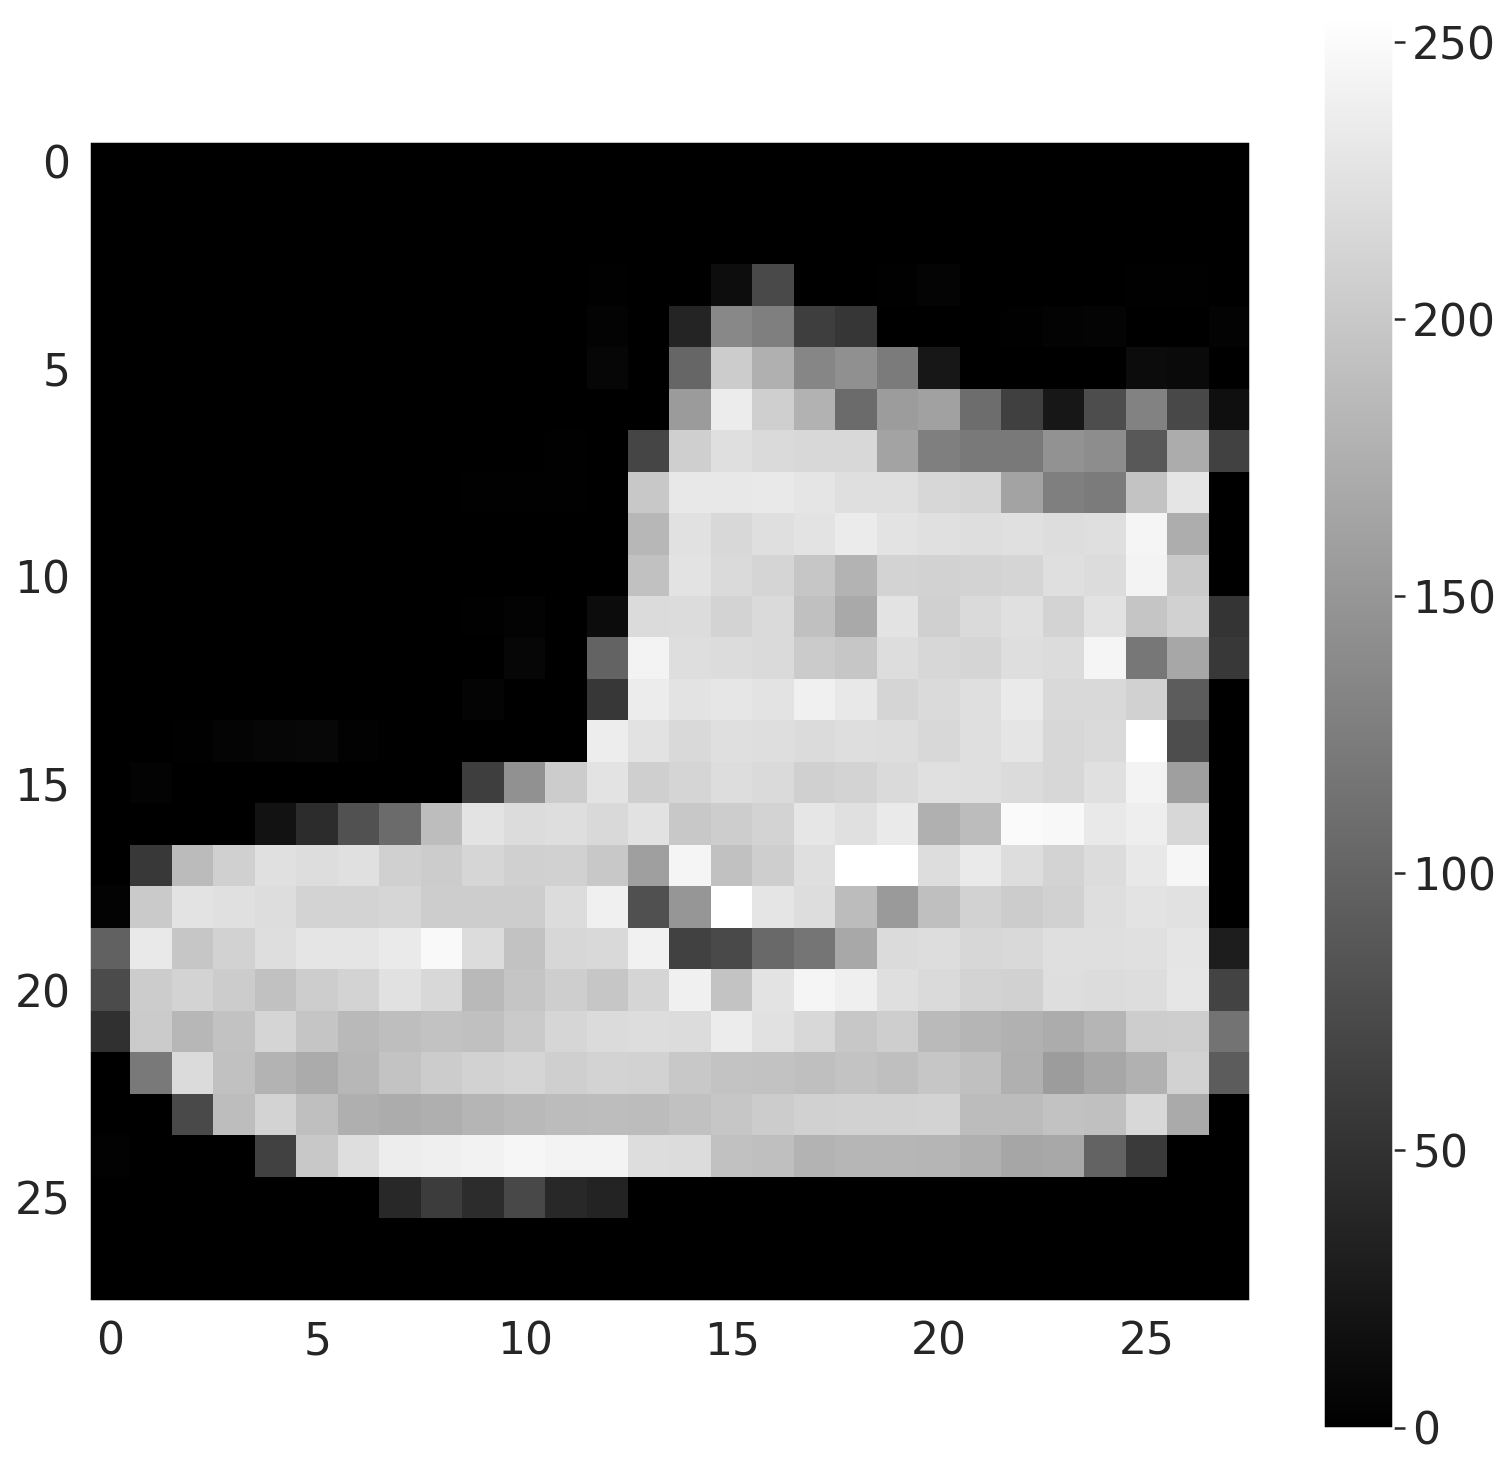

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap ="gray")
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacero, divida los valores por 255. Es importante que el *training set* y el *testing set* se pre-procesen de la misma forma:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el training set y despleguemos el nombre de cada clase debajo de cada imagen.

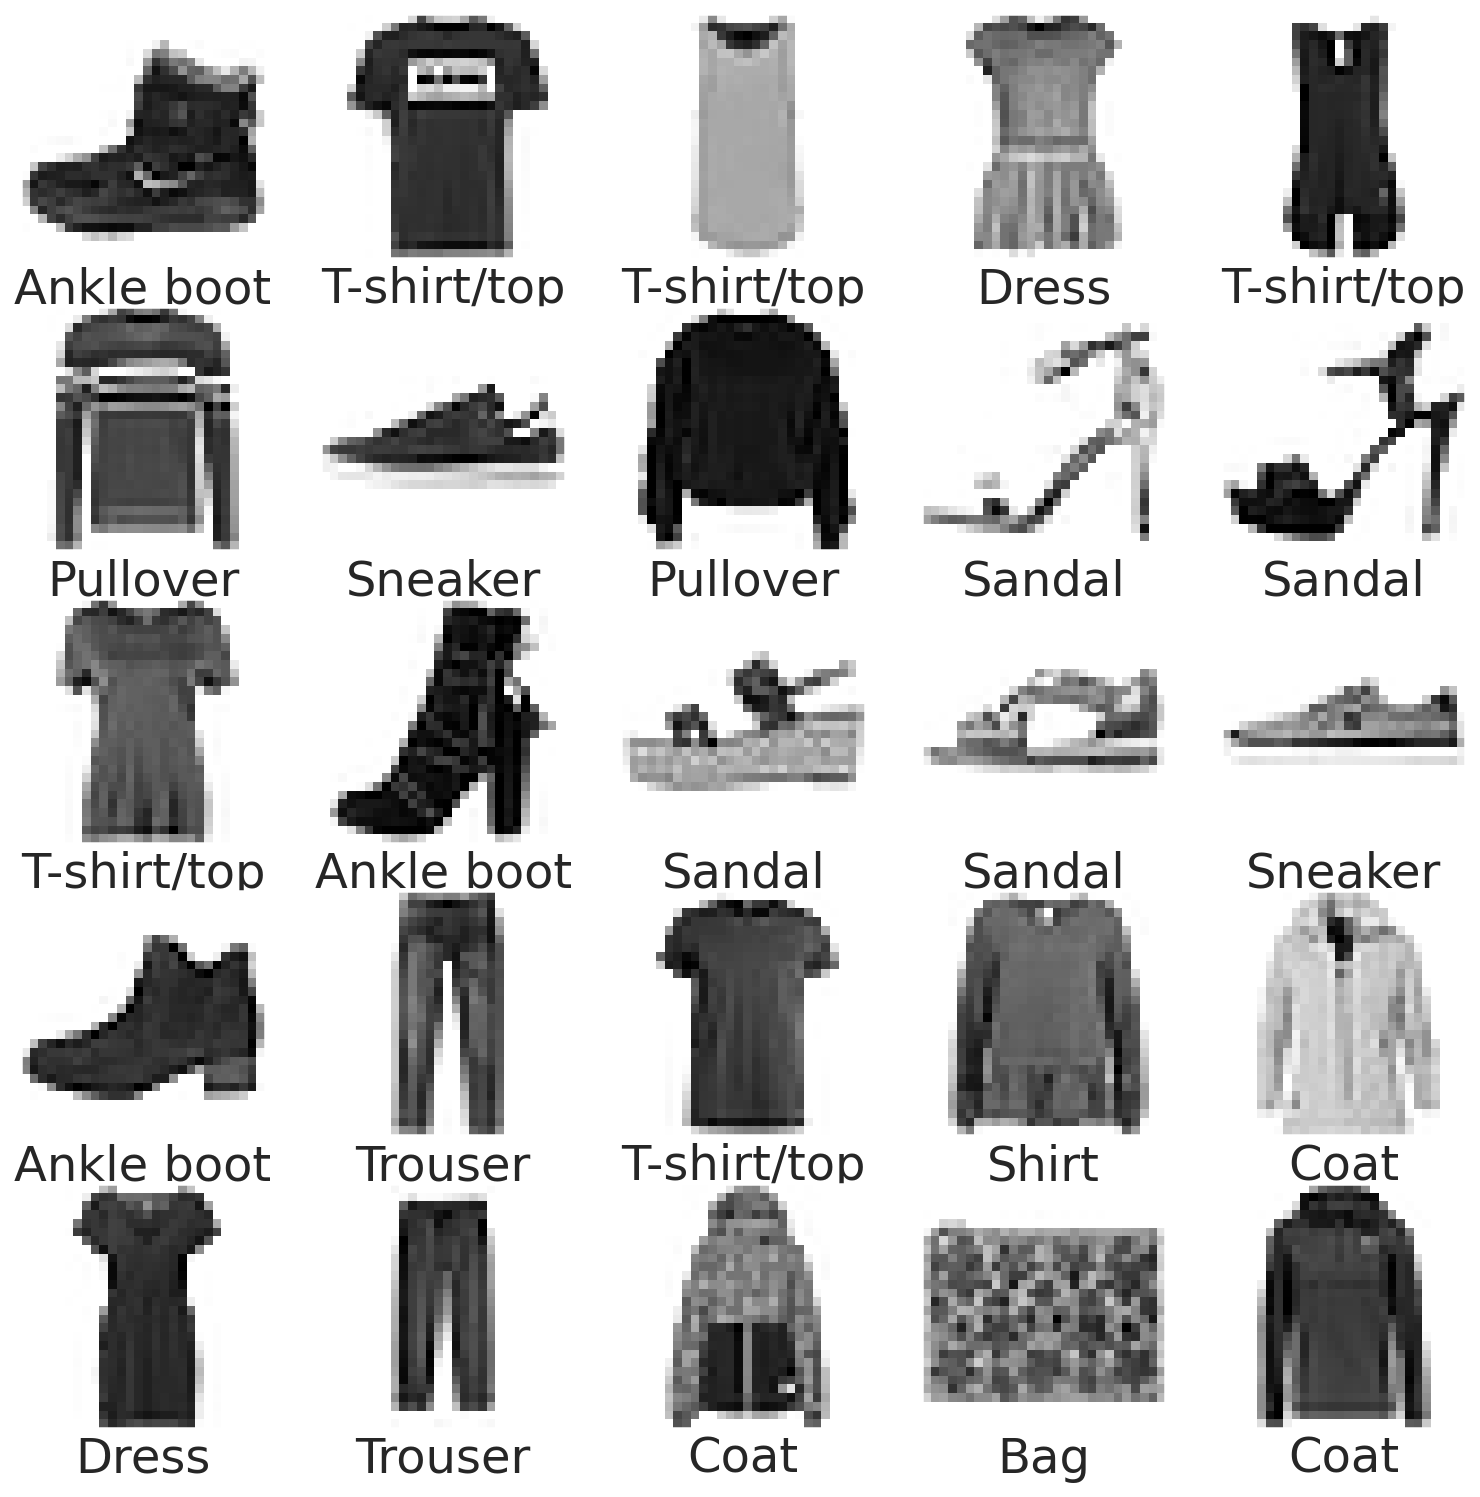

In [ ]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

Los bloques de construccion basicos de una red neuronal son las *capas* o *layers*. Las capas extraen representaciones de el set de datos que se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. 
La mayoria de las capas como `tf.keras.layers.Dense`, tienen parametros que son aprendidos durante el entrenamiento.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),

    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(10, activation='softmax')
])

# inputs  = keras.layers.Flatten(input_shape=(28, 28))
# hidden1 = keras.layers.Dense(128, activation='relu')(inputs)
# hidden2 = keras.layers.Dense(128, activation='relu')(hidden1)
# hidden3 = hidden1 + hidden2
# outputs = keras.layers.Dense(10, activation='softmax')(hidden3)
# model = tf.keras.Model(inputs, outputs, name="FFNN")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


La primera capa de esta red, `tf.keras.layers.Flatten`, 
transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capas`tf.keras.layers.Dense`. Estas estan densamente conectadas, o completamente conectadas. La primera capa `Dense` tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos *softmax* que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

### Compile el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.
El siguiente ejemplo usa *accuracy* (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer='adam', # adam, sgd
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en los arreglos `train_images` y `train_labels`.
2. el modelo aprende a asociar imagenes y etiquetas.
3. Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo `test_images`. Verifique que las predicciones sean iguales a las etiquetas de el arreglo`test_labels`.

Para comenzar a entrenar, llame el metodo `model.fit`, es llamado asi por que *fit* (ajusta) el modelo a el set de datos de entrenamiento:

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1, callbacks=[callback])

Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.5119 - accuracy: 0.8204 - val_loss: 0.4169 - val_accuracy: 0.8490
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3860 - accuracy: 0.8605 - val_loss: 0.3839 - val_accuracy: 0.8612
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3434 - accuracy: 0.8750 - val_loss: 0.3640 - val_accuracy: 0.8633
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3193 - accuracy: 0.8833 - val_loss: 0.3436 - val_accuracy: 0.8732
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3006 - accuracy: 0.8893 - val_loss: 0.3260 - val_accuracy: 0.8815
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2843 - accuracy: 0.8943 - val_loss: 0.3289 - val_accuracy: 0.8853
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2714 - accuracy: 0.9001 - val_loss: 0.3133 - val_accuracy:

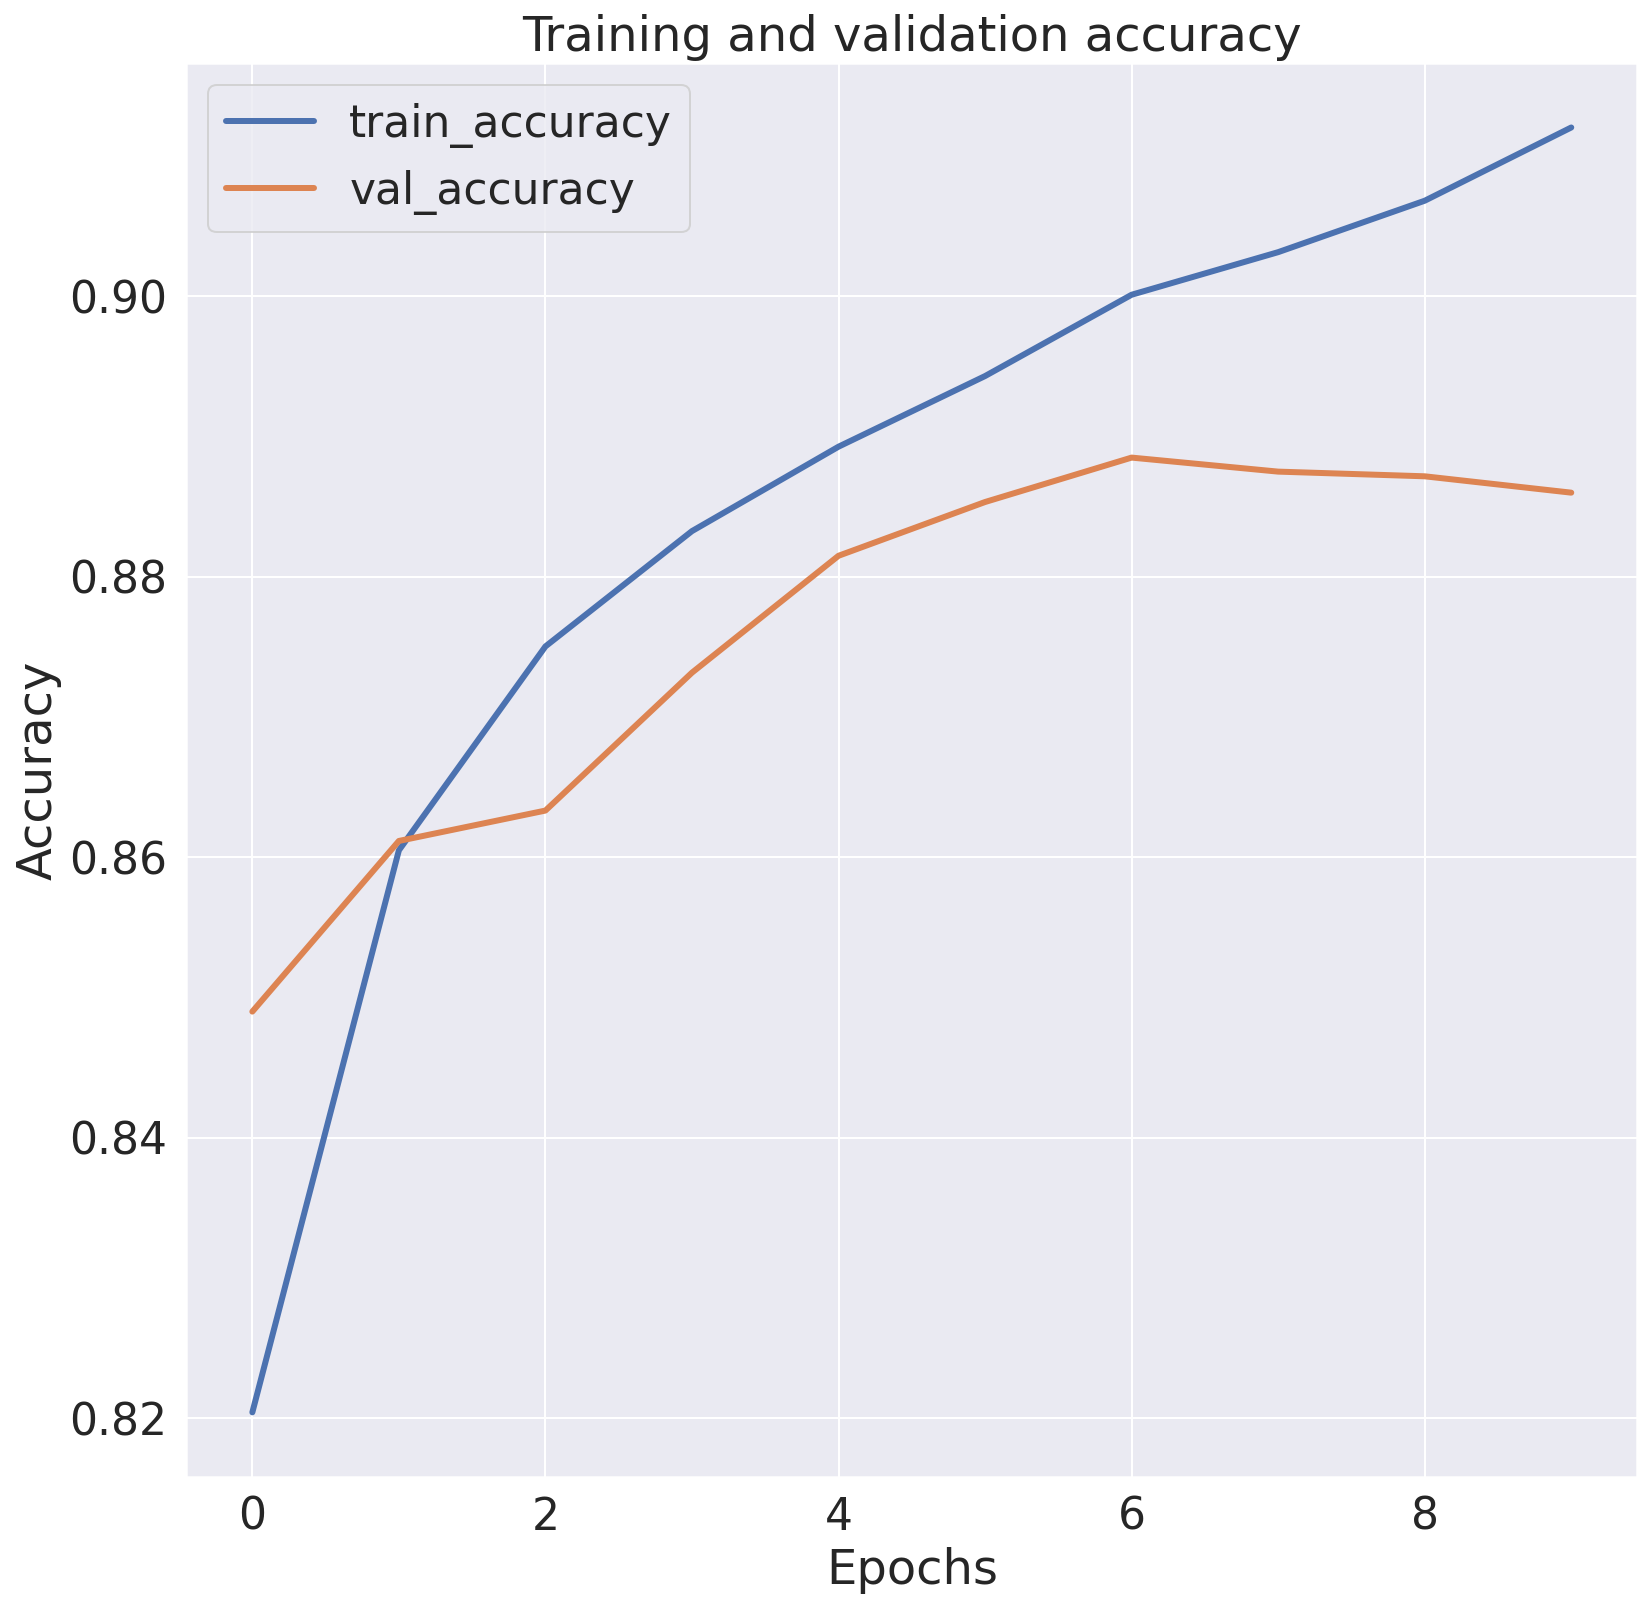

In [ ]:
sns.set(font_scale=2)
plt.plot(history.history['accuracy'], lw = 3)
plt.plot(history.history['val_accuracy'], lw = 3)
plt.legend(["train_accuracy", 'val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy");

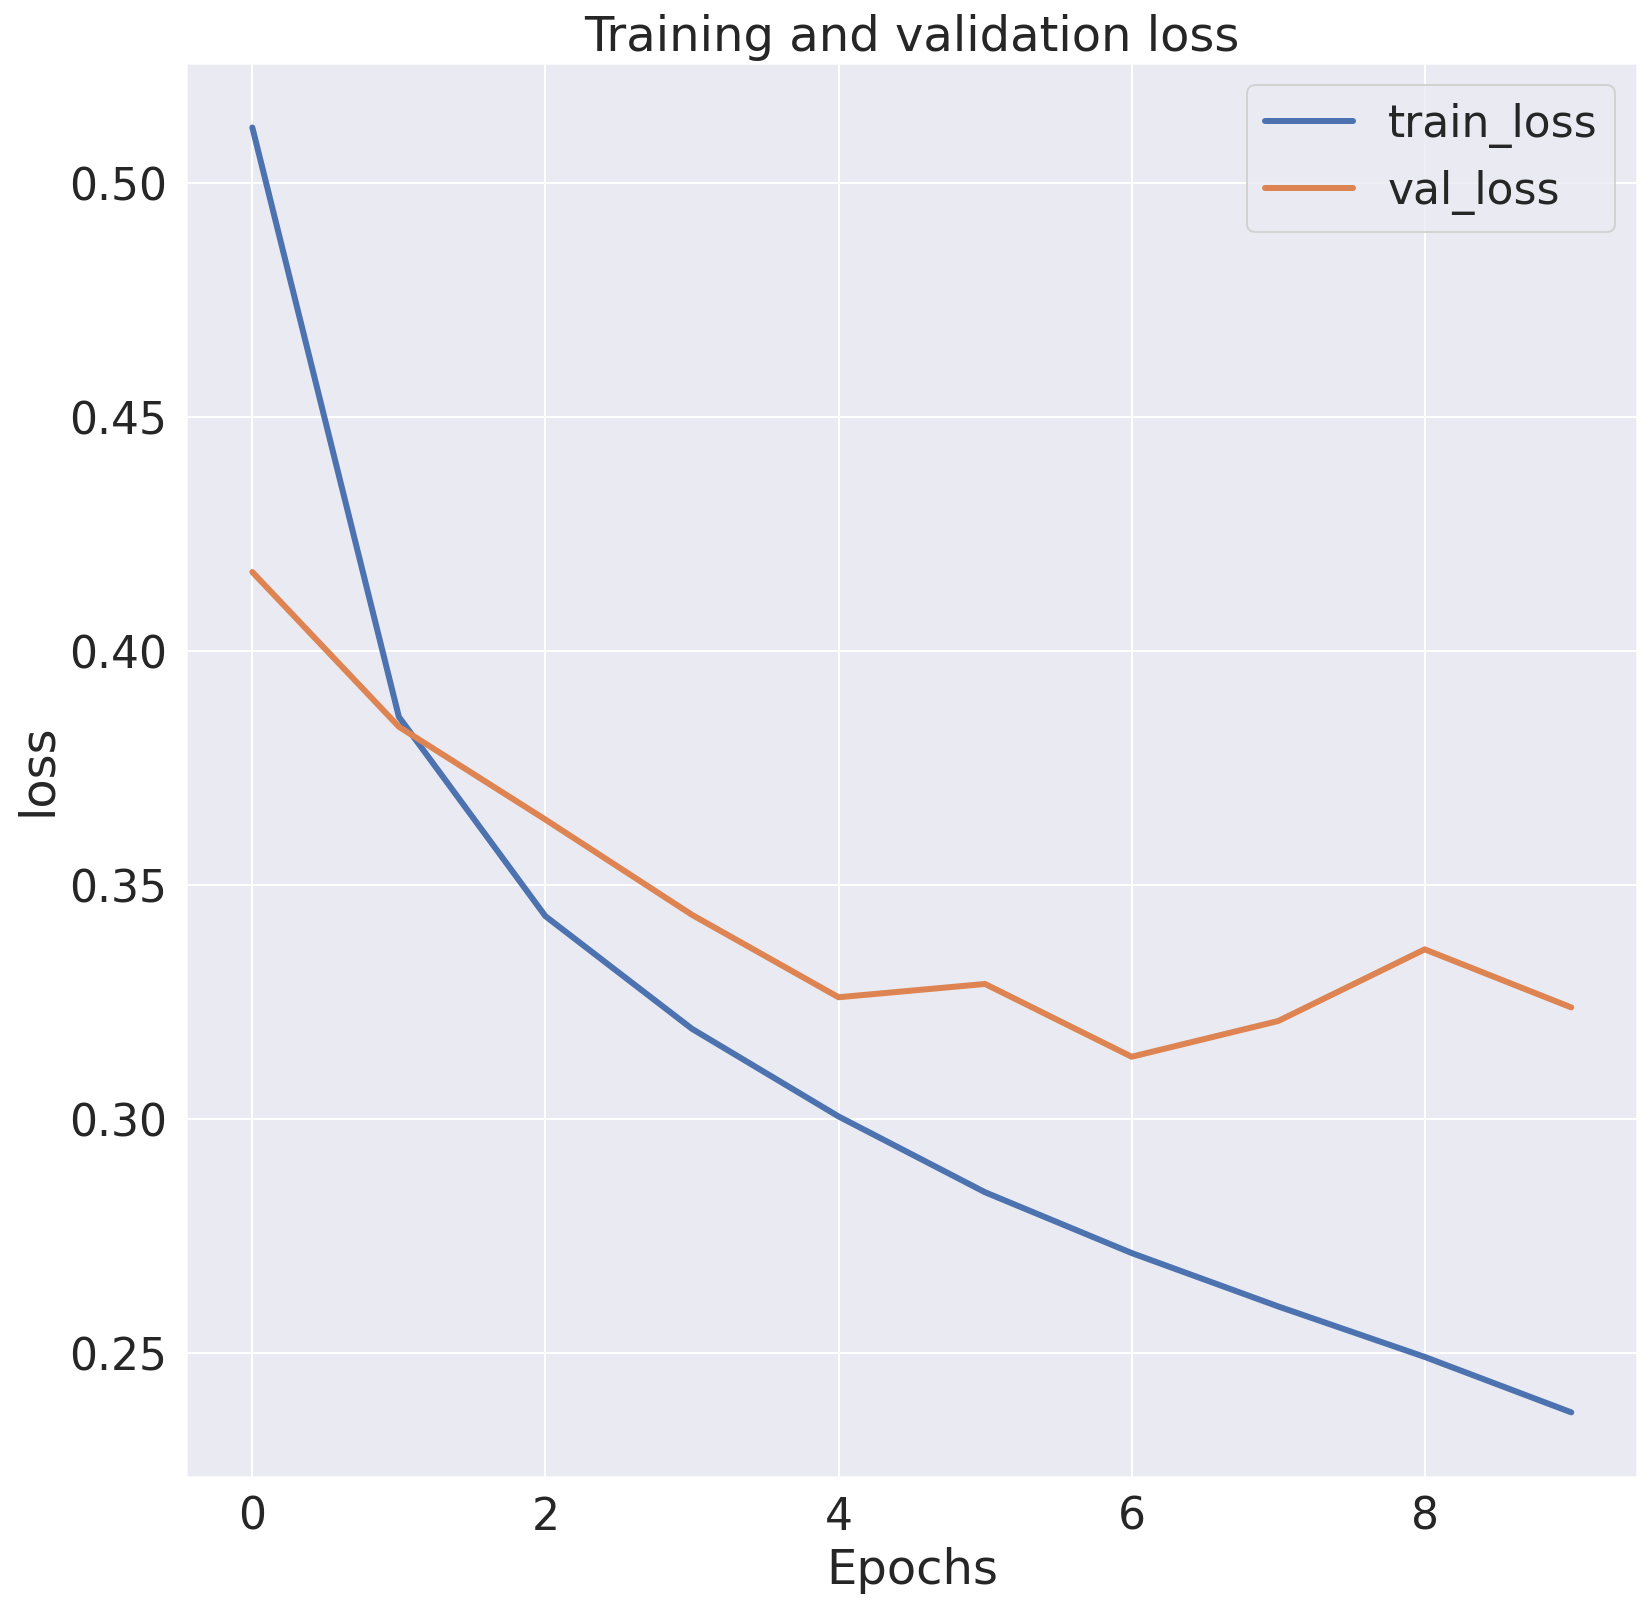

In [ ]:
plt.plot(history.history['loss'], lw = 3)
plt.plot(history.history['val_loss'], lw = 3)
plt.legend(["train_loss", 'val_loss'])
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("loss");

## Evaluar en Test Set

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3426 - accuracy: 0.8806 - 660ms/epoch - 2ms/step

Test accuracy: 0.8805999755859375


Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe a *overfitting* (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.

## Hacer predicciones

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([6.7108579e-07, 6.9050993e-10, 5.9084982e-06, 5.3814449e-07,
       1.5022086e-06, 2.5402944e-05, 1.6210690e-07, 9.9247899e-03,
       1.8758975e-06, 9.9003917e-01], dtype=float32)

*una* prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Ustedes pueden revisar cual tiene el nivel mas alto de confianza:

In [ ]:
np.argmax(predictions[0])

9

Entonces,el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o class_names[9]. Examinando las etiquetas de test o de pruebas muestra que esta clasificaion es correcta:

In [ ]:
test_labels[0]

9

In [ ]:
# Predicciones en data que subimos nosotros
from ipywidgets import FileUpload
from IPython.display import display
uploader = FileUpload(multiple=True)
uploader

FileUpload(value={}, description='Upload', multiple=True)

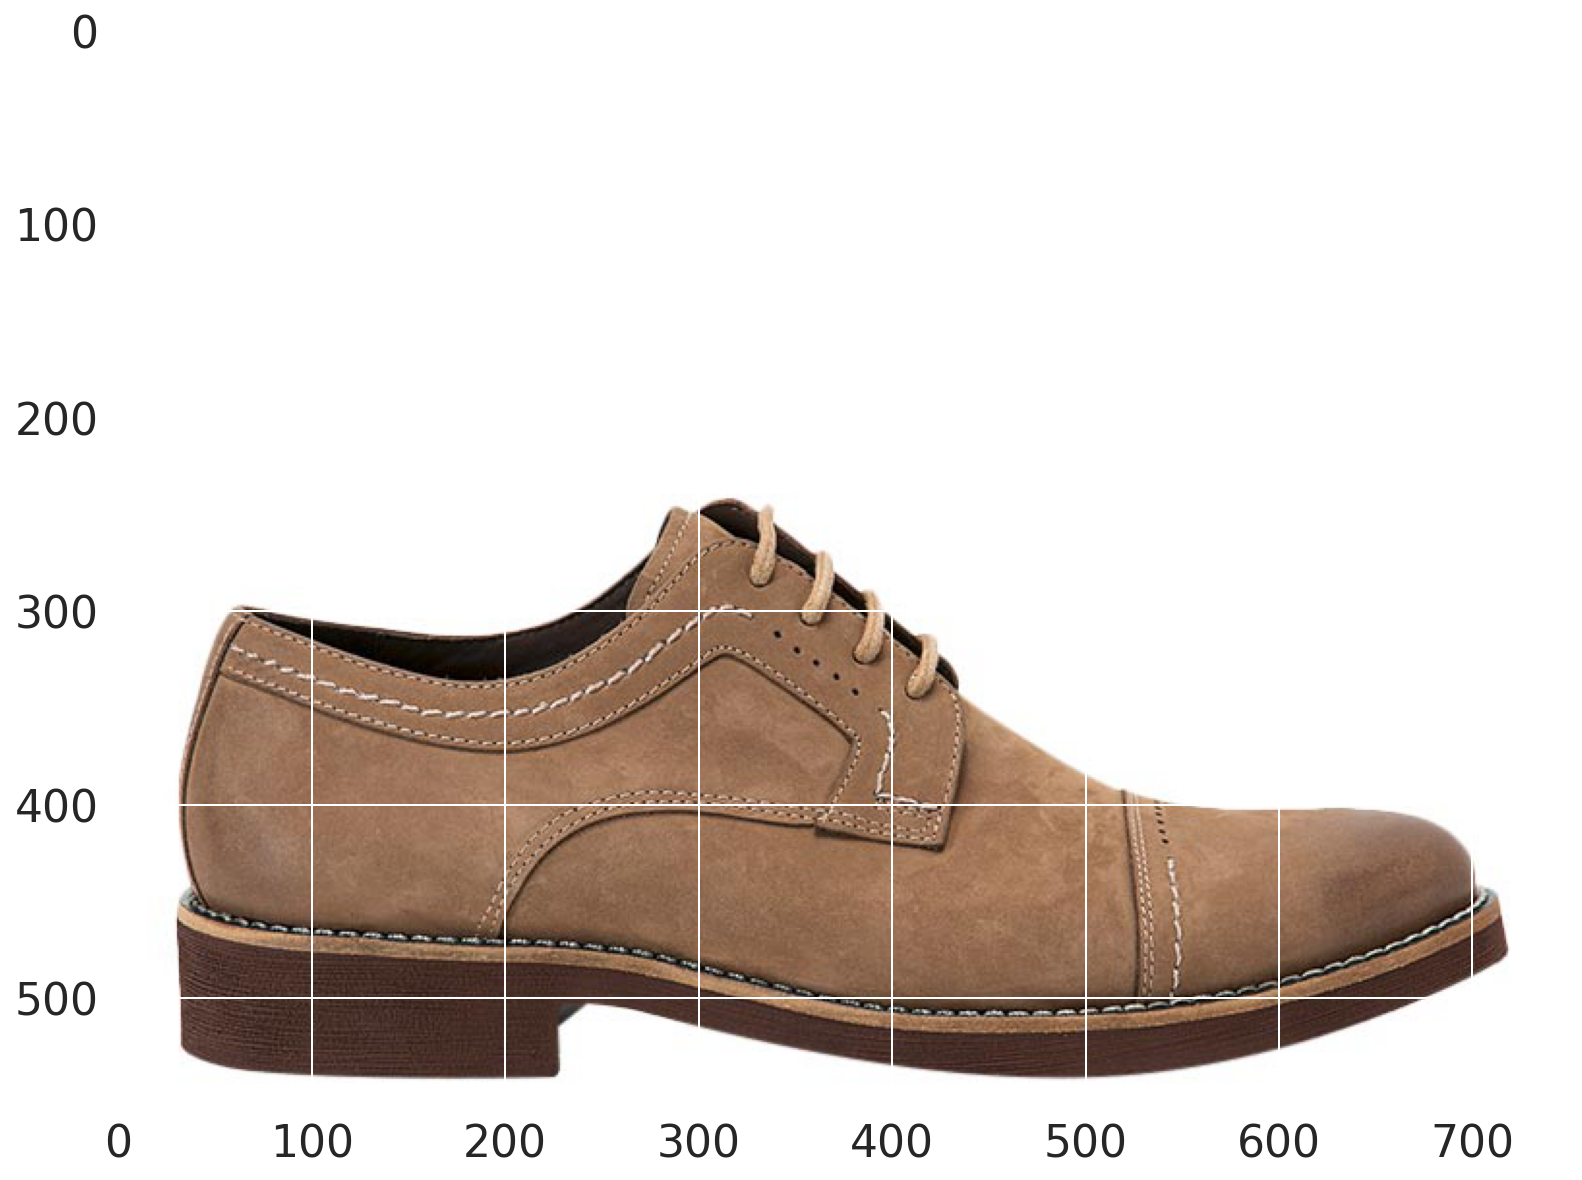

In [ ]:
img = uploader.data[0]
img = PILImage.create(img)
plt.imshow(img)

In [ ]:
from PIL import Image

def transform_img(img):
  imgGray = img.convert('L')
  imgGray = imgGray.resize((28,28))
  plt.imshow(imgGray, cmap = "gray")
  imgGray = np.array(imgGray) / 255.0
  imgGray = (np.expand_dims(imgGray,0))
  return imgGray

[[6.7272833e-11 5.1671264e-18 5.4658929e-12 1.5129105e-15 2.8498254e-19
  4.7318284e-18 5.1813623e-07 9.1436424e-21 9.9999952e-01 4.1638597e-19]]


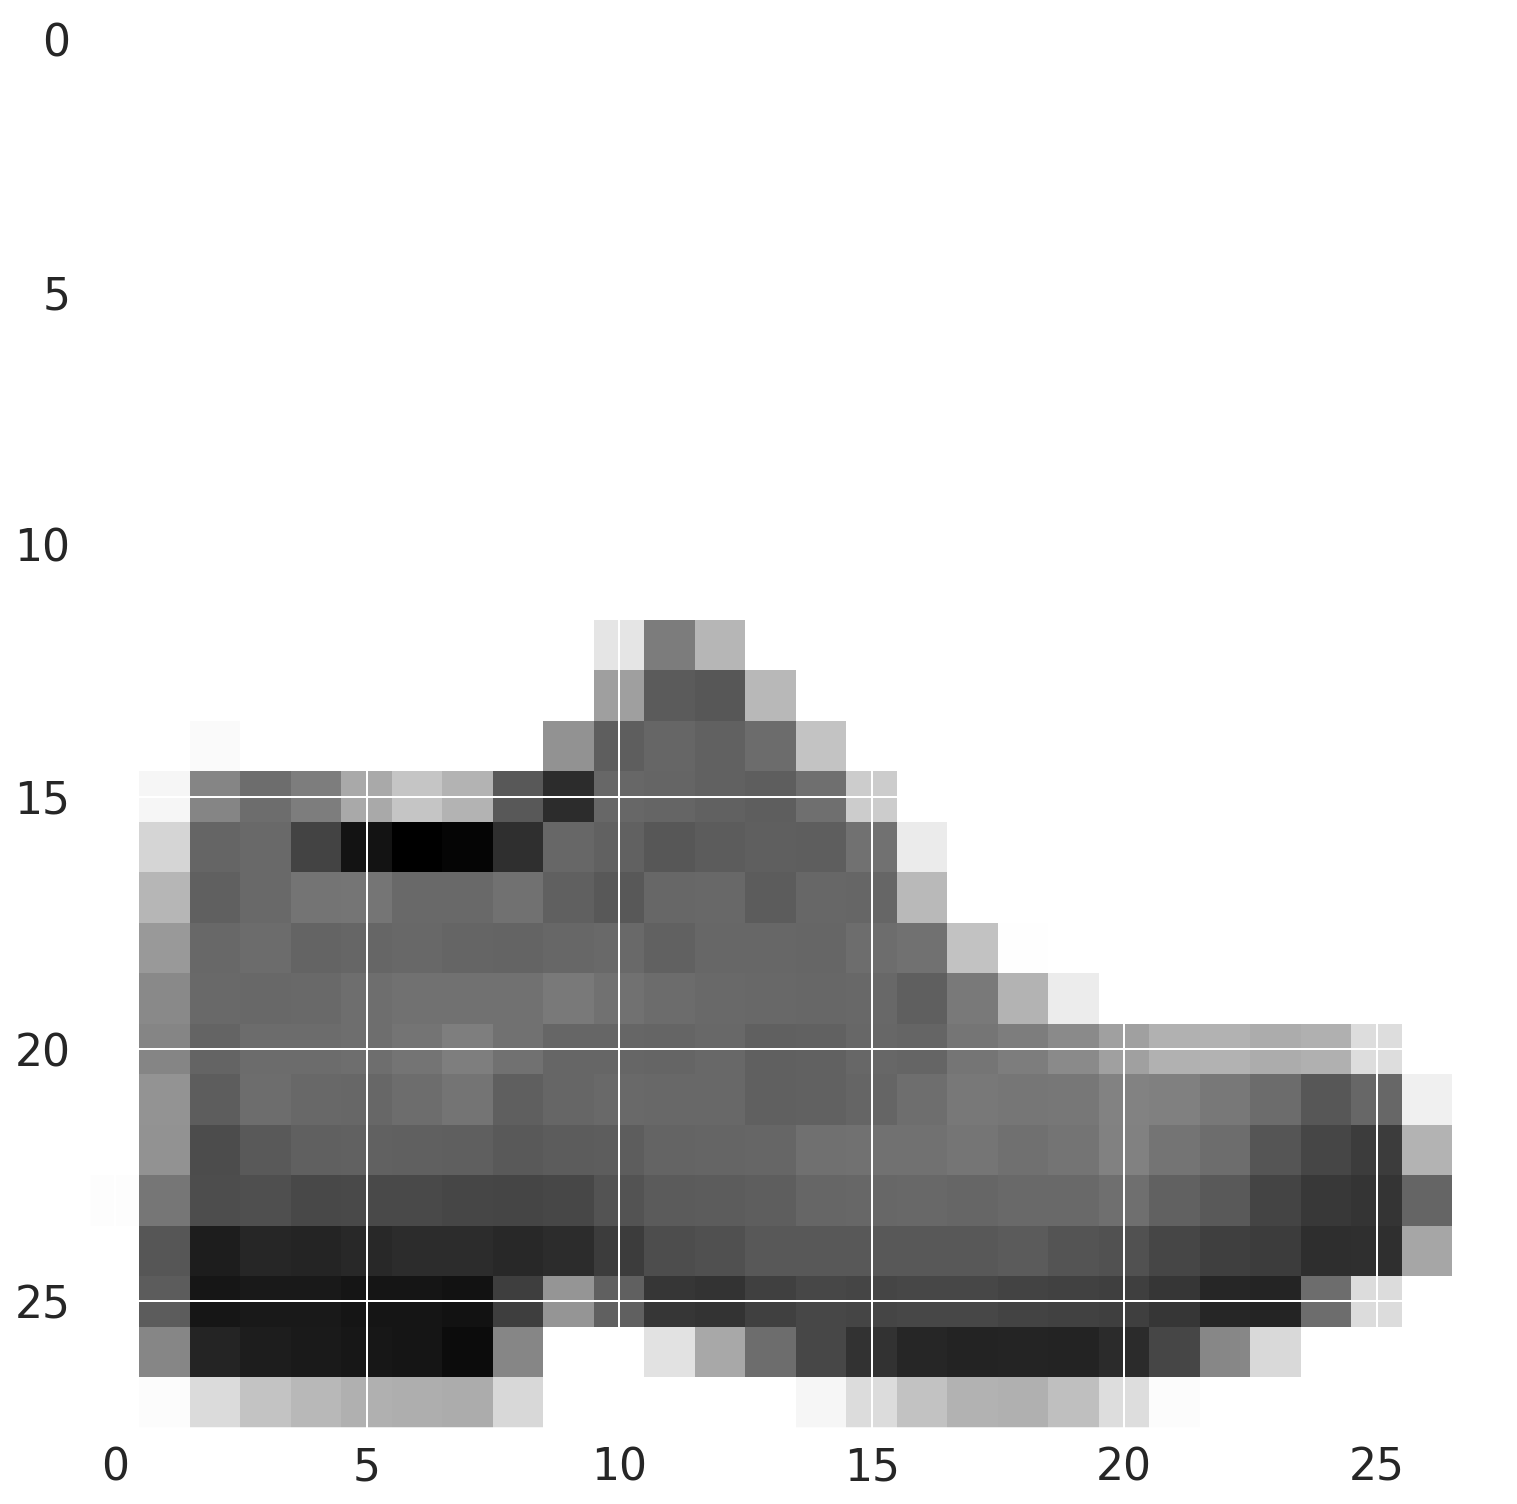

In [ ]:
pred = model.predict(transform_img(img))
print(pred)

In [ ]:
class_names[np.argmax(pred)]

'Bag'

### Mirar predicciones

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
sns.set(font_scale=2)
plt.rcParams["figure.figsize"] = (13, 5)

Miremos la imagen [0], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

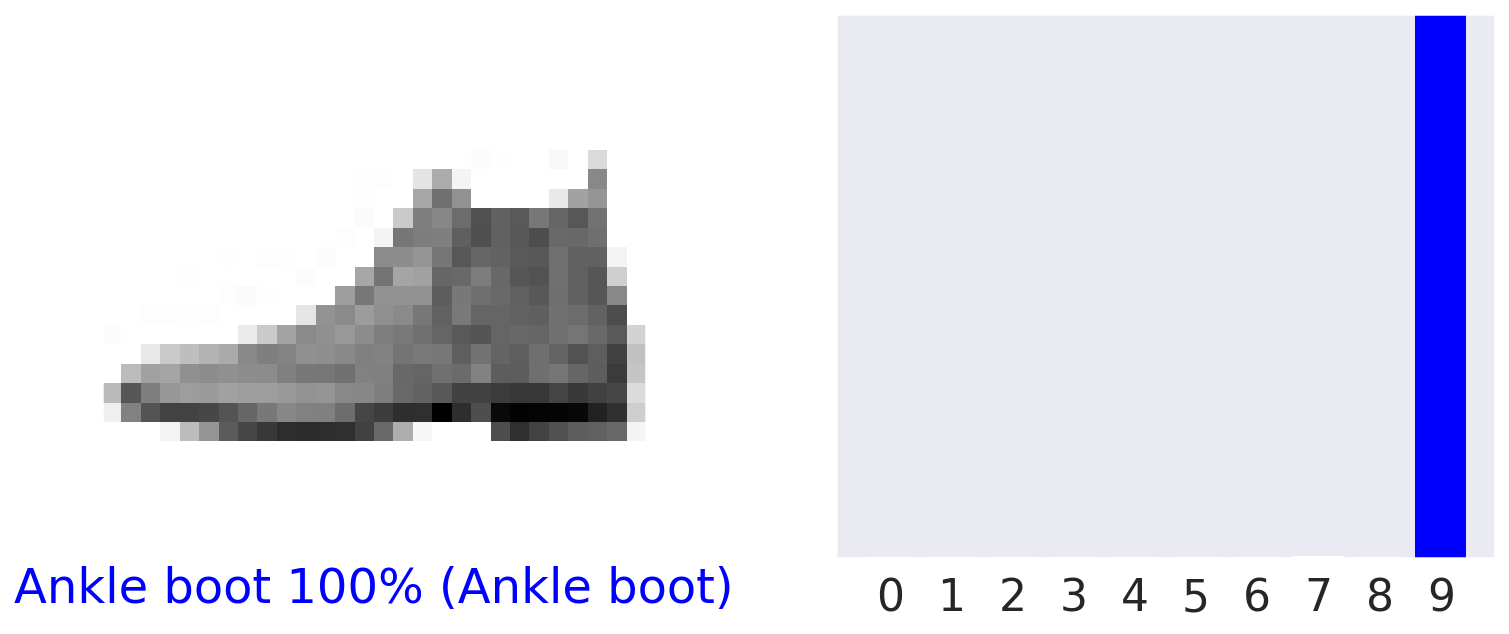

In [ ]:
i = 0
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

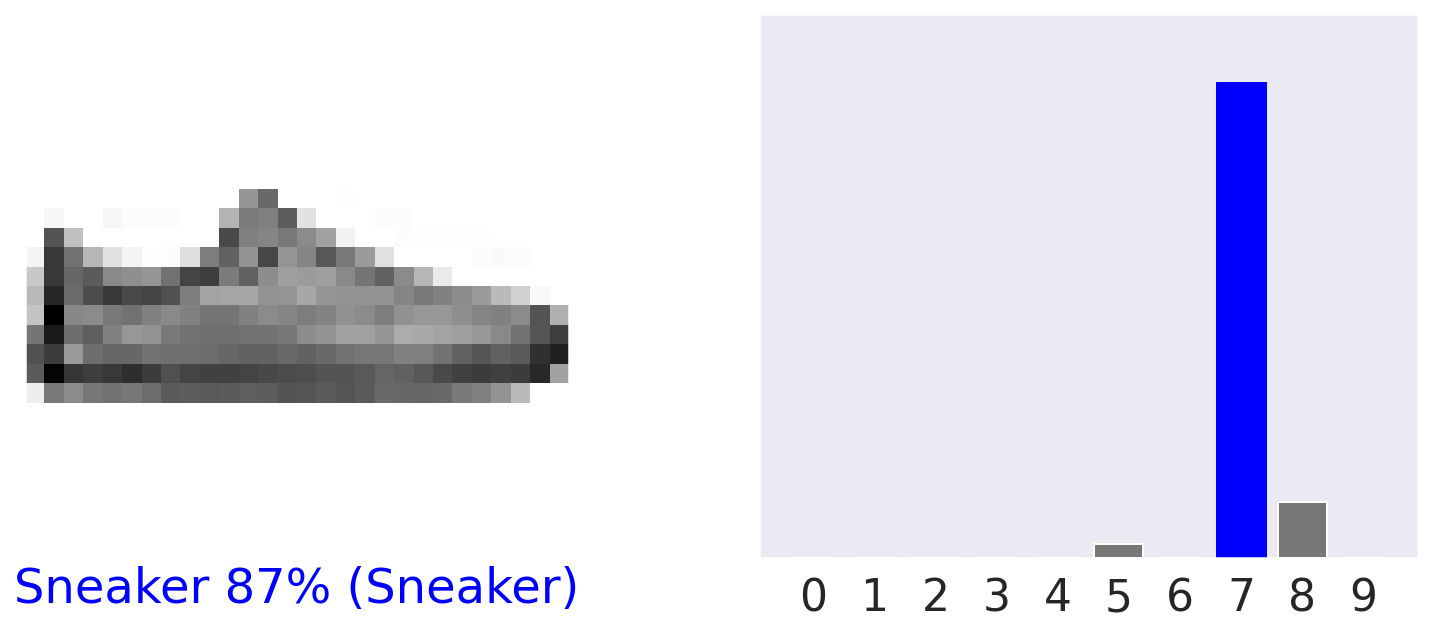

In [ ]:
i = 12
# plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

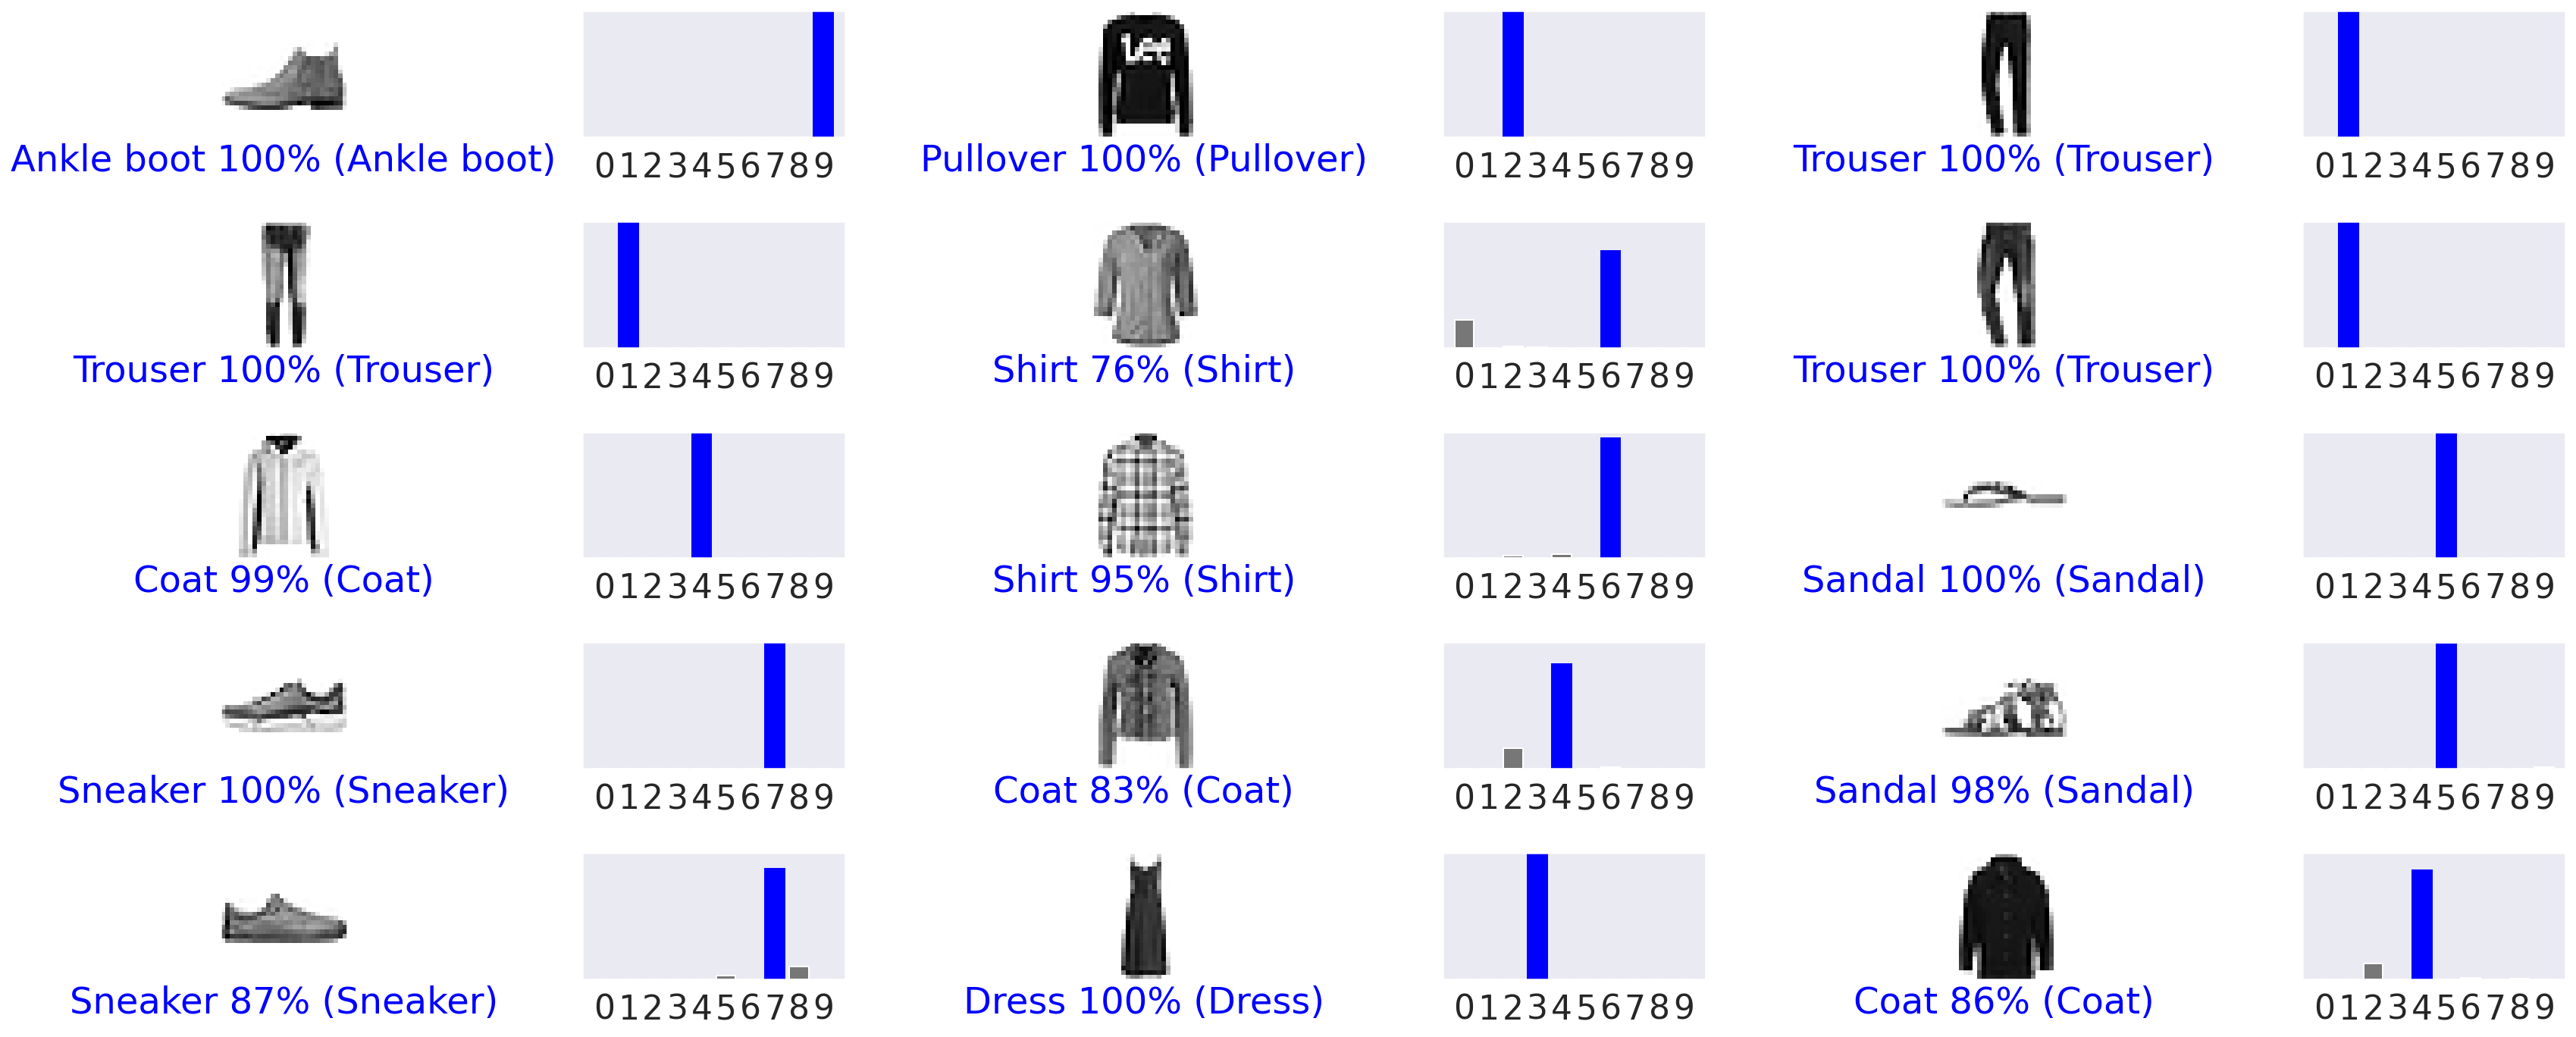

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(4*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Los modelos de `tf.keras` son optimizados sobre *batch* o bloques, 
o coleciones de ejemplos por vez.
De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.4171337e-05 2.4664374e-12 9.9837661e-01 4.1950536e-09 8.8737765e-04
  2.2519641e-14 7.2187721e-04 4.0896293e-17 2.2463458e-09 1.5044490e-11]]


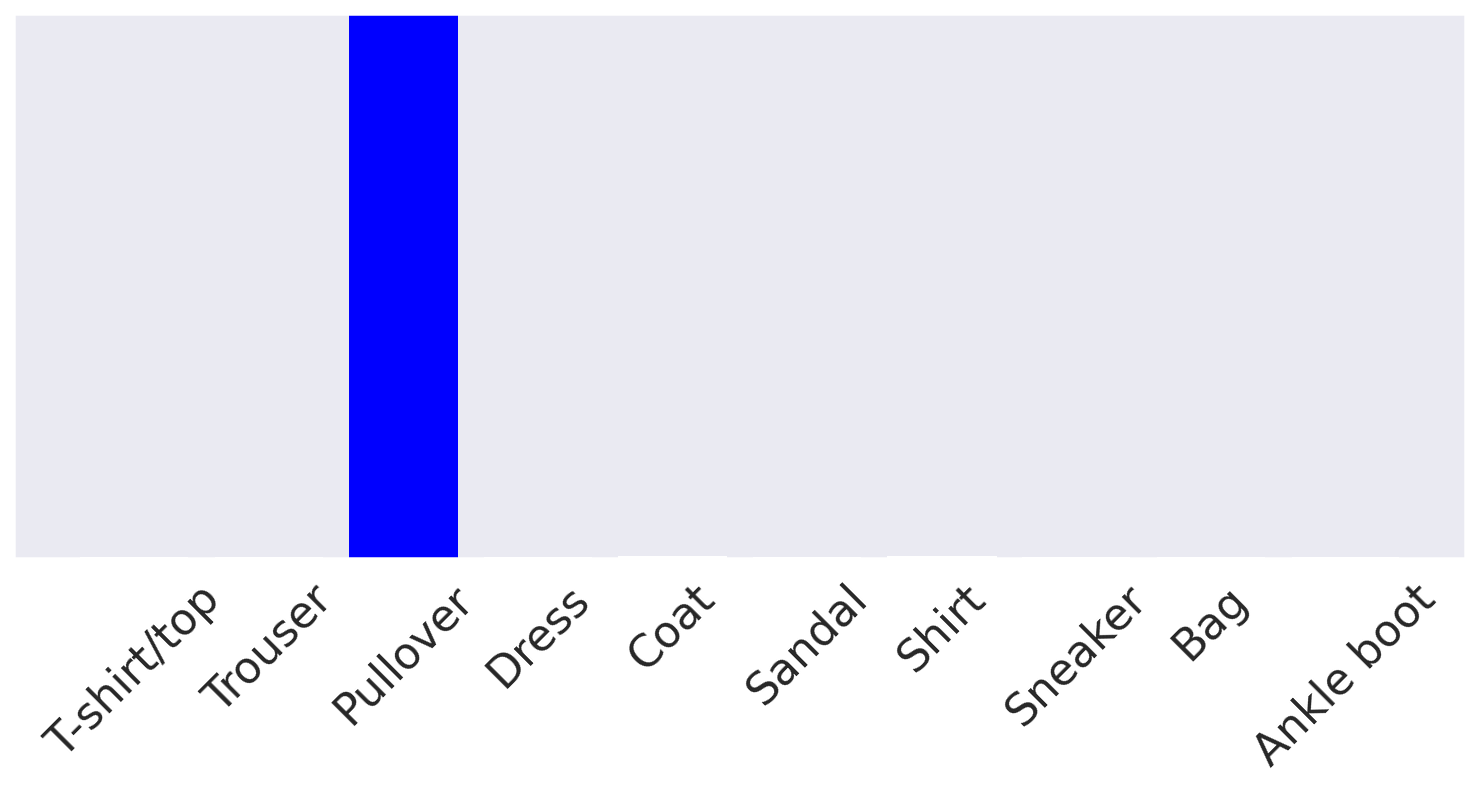

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna una lista de listas para cada imagen dentro del *batch* o bloque de datos. Tome la prediccion para nuestra unica imagen dentro del *batch* o bloque:

In [ ]:
np.argmax(predictions_single[0])

2

Y el modelo predice una etiqueta de 2.

# CNN

![CNN](https://imgr.search.brave.com/Oq5GNSOAI3em7qKDzDG0BtFFVjb8_3wxuabIVBOqlgk/fit/820/425/ce/1/aHR0cHM6Ly93d3cu/bmljZXBuZy5jb20v/cG5nL2RldGFpbC8y/MzQtMjM0NzI4N19j/bm4tdmlzdWFsaXph/dGlvbi1vcmlnaW5h/bDEtdmlzdWFsaXph/dGlvbi5wbmc)

In [ ]:
model = keras.Sequential([
                          
])
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(500,use_bias=False)) #13
model.add(keras.layers.Activation('relu')) #14
#Fully connected final layer
model.add(keras.layers.Dense(10)) #8
model.add(keras.layers.Activation('softmax')) #9

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_7 (Flatten)         (None, 576)             

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer='adam', # adam, sgd
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1, callbacks=[callback])

Epoch 1/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.4811 - accuracy: 0.8218 - val_loss: 0.3279 - val_accuracy: 0.8748
Epoch 2/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3064 - accuracy: 0.8874 - val_loss: 0.2868 - val_accuracy: 0.8940
Epoch 3/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2607 - accuracy: 0.9037 - val_loss: 0.2554 - val_accuracy: 0.9055
Epoch 4/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.2316 - accuracy: 0.9142 - val_loss: 0.2501 - val_accuracy: 0.9087
Epoch 5/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.2040 - accuracy: 0.9237 - val_loss: 0.2442 - val_accuracy: 0.9132
Epoch 6/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.1820 - accuracy: 0.9314 - val_loss: 0.2499 - val_accuracy: 0.9152
Epoch 7/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.1618 - accuracy: 0.9389 - val_loss: 0.2640 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
plt.plot(history.history['accuracy'], lw = 3)
plt.plot(history.history['val_accuracy'], lw = 3)
plt.legend(["train_accuracy", 'val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy");

# Modelo más complejo

- Agregando BatchNormalization (Una técnica de regularización)
- Dropout
- FFNN después de convoluciones

In [ ]:
droprate=0.25
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Dropout(droprate))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(500,use_bias=False)) #13
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu')) #14
model.add(keras.layers.Dropout(droprate))      #15

#Fully connected final layer
model.add(keras.layers.Dense(10)) #8
model.add(keras.layers.Activation('softmax')) #9

model.compile(loss="sparse_categorical_crossentropy", #keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1, callbacks=[callback])

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

In [ ]:
plt.plot(history.history['accuracy'], lw = 3)
plt.plot(history.history['val_accuracy'], lw = 3)
plt.legend(["train_accuracy", 'val_accuracy'])
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy");